# Results 

## Description
In this notebook, we will compare multiple classifiers from different perspectives:
1. Accuracy vs. Imbalance
2. Risk curves
3. Losses vs. Iterations

The following classifiers are considered:
 - Bagging
 - AdaBoost
 - AdaCost
 - Boosting SVM?
 - AdaMEC
 - XGBoost



In [1]:
# Libraries
from classifiers import *
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

In [2]:
# Functions (if any)


### Load Data

In [3]:
scaler = StandardScaler()
data = pd.read_pickle("./data_no_cathegorical.pkl")

X = data.values[:,:-1]
scaler.fit(X)
X = scaler.transform(X)
Y = data.values[:,-1]

# Split data into train and test sets
seed = 10
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Labels for this algortihm has to be either 1 or -1
y_train = np.where(y_train < 0.5, -1, 1)
y_test = np.where(y_test < 0.5, -1, 1)

## Graph 1: Accuracy vs. Imbalance

In [4]:
# Get priors
prior0 = len(np.where(y_train==-1)[0])/len(y_train)
prior1 = len(np.where(y_train==1)[0])/len(y_train)
print(prior0,prior1)

0.7293164556962025 0.2706835443037975


In [5]:
# We will undersample class -1 until we revert the imbalance
X_train_0 = X_train[np.where(y_train==-1)[0],:]
X_train_1 = X_train[np.where(y_train==1)[0],:]
y_train_0 = y_train[np.where(y_train==-1)[0]]
y_train_1 = y_train[np.where(y_train==1)[0]]

x_train_sets = [np.r_[X_train_0[:int(len(X_train_0)*pctg),:], X_train_1] for pctg in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]]
y_train_sets = [np.r_[y_train_0[:int(len(X_train_0)*pctg)], y_train_1] for pctg in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]]

# Get new imbalances
imbalances = []
for y_train in y_train_sets:
    imbalances.append(len(np.where(y_train==-1)[0])/len(y_train))
print(imbalances)

[0.7080124528920203, 0.6830873199359773, 0.6534871661913404, 0.6178152702316271, 0.5739560089257252, 0.5186819123075538, 0.4469845867383883, 0.350109409190372, 0.21220159151193635]


In [6]:
# Get classifier for each imbalanced dataset
# ADABOOST
AdaBoost_set = [AdaBoostClassifier(n_estimators=100).fit(X_train,y_train) for X_train,y_train in zip(x_train_sets, y_train_sets)]
print('AdaBoost - OK')

AdaBoost - OK


In [7]:
# ADACOST
AdaCost_set = []
for X_train,y_train in zip(x_train_sets, y_train_sets):
    ac = AdaCost(n_iterations=100)
    ac.fit(X_train,y_train,cost=-0.4)
    AdaCost_set.append(ac)
     
print('AdaCost - OK')

Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
A

Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
A

Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
Adacost classifier trained
A

In [8]:
# ADAMEC
AdaMEC_set = [AdaMEC(n_iterations=100).fit(X_train,y_train) for X_train,y_train in zip(x_train_sets, y_train_sets)]
print('AdaMEC - OK')


AdaMEC - OK


In [9]:
# XGBOOST
XGBoost_set = [XGBClassifier().fit(X_train,y_train) for X_train,y_train in zip(x_train_sets, y_train_sets)]
print('XGBoost - OK')

XGBoost - OK


### Plot

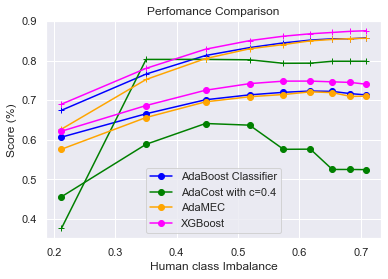

In [11]:
classifier_label = ['AdaBoost Classifier', 'AdaCost with c=0.4','AdaMEC','XGBoost']
classifier_color = ['blue','green','orange','magenta']
cont = 0
plt.figure()
for classifiers in [AdaBoost_set, AdaCost_set, AdaMEC_set, XGBoost_set]:
    acc = []
    f1 = []
    # Calculate accuracies
    for classifier in classifiers:
        acc.append(accuracy_score(classifier.predict(X_test),y_test))
        f1.append(f1_score(classifier.predict(X_test),y_test))
    
    plt.plot(imbalances, f1,'-o', color = classifier_color[cont],label = classifier_label[cont])
    plt.plot(imbalances, acc,'-+', color = classifier_color[cont])
    
    cont += 1

plt.title('Perfomance Comparison')
plt.xlabel('Human class Imbalance')
plt.ylabel('Score (%)')
plt.legend()


In [ ]:
# TODO: Add bagging
# SVM?

### Graph 2: Risk curves

### Graph 3: Losses vs. Iterations